The correleated_features GDP (current LCU)                                           0.994838
Currency Outside Banks                                      0.981376
Currency in Circulation                                     0.978817
Official exchange rate (LCU per US$, period average)        0.975285
Narrow Money                                                0.970981
Demand Deposits                                             0.964555
Base Money                                                  0.959773
Credit to Private Sector                                    0.954128
Net Domestic Credit                                         0.949082
Money Supply M2                                             0.944433
Net Domestic Assets                                         0.935709
Bank Reserves                                               0.929107
Quasi Money                                                 0.920654
GDP (constant LCU)                                          0.901015
Populatio

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


Best Parameters: {'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best Cross-Validation R-squared: 0.9813572242231169
Optimized Random Forest - Mean Squared Error: 59.750063193391284, R-squared: 0.997265227586082
Validation Mean Squared Error: 25.017815866795196, Validation R-squared: 0.9983450629755042
                                             Feature  Importance
3  Official exchange rate (LCU per US$, period av...    0.134701
6                                         Base Money    0.116149
9                                    Money Supply M2    0.113501
2                            Currency in Circulation    0.103259
5                                    Demand Deposits    0.098713
0                                  GDP (current LCU)    0.096917
8                                Net Domestic Credit    0.095295
4                                       Narrow Money    0.095009
1                             Currency Outside Ba

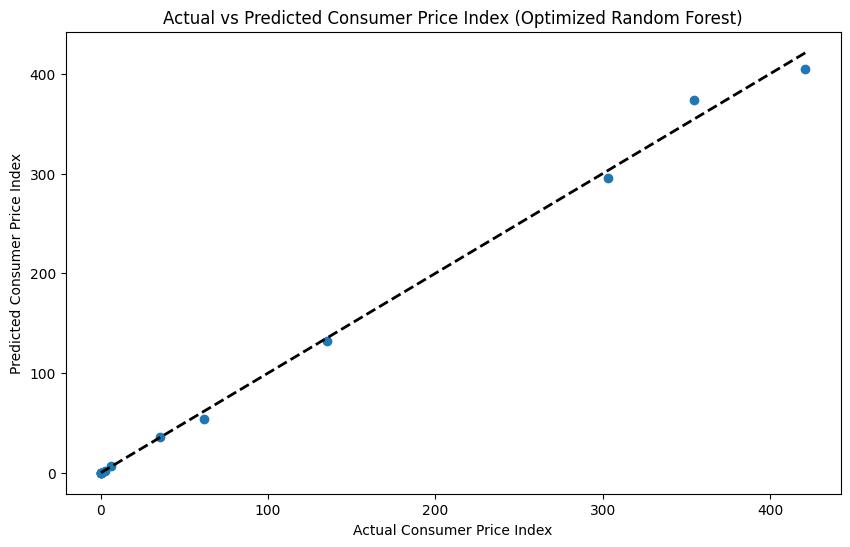

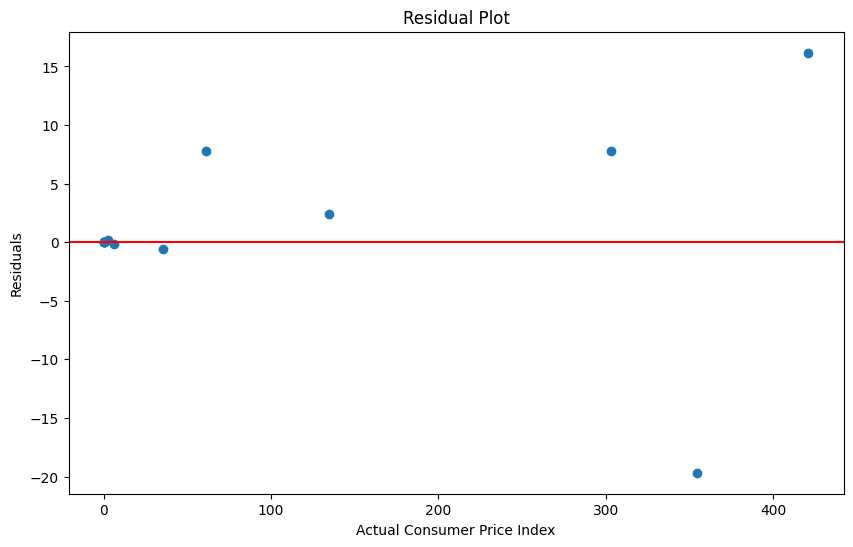

Linear Regression - Mean Squared Error: 58.208259837851784, R-squared: 0.9973357962358719


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the CSV file

data = pd.read_csv("/content/1960_onwards.csv")

# Calculate the correlation matrix
correlation_matrix = data.corr()

# Select the top correlated features with the target variable 'Consumer price index (2010 = 100)'
target_variable = 'Consumer price index (2010 = 100)'
correlated_features = correlation_matrix[target_variable].drop(target_variable).sort_values(ascending=False)
top_features = correlated_features.head(10).index.tolist()
print("The correleated_features",correlated_features)
print("top features",top_features)
# Prepare the feature matrix (X) and target vector (y)
X = data[top_features]
y = data[target_variable]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Hyperparameter Tuning for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42), param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='r2')
grid_search.fit(X_train, y_train)

print(f'Best Parameters: {grid_search.best_params_}')
print(f'Best Cross-Validation R-squared: {grid_search.best_score_}')

# Get the best model
best_rf_model = grid_search.best_estimator_

# Evaluate the best model on the test set
y_pred_best = best_rf_model.predict(X_test)
mse_best = mean_squared_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)

print(f'Optimized Random Forest - Mean Squared Error: {mse_best}, R-squared: {r2_best}')

# Evaluate the model on a separate validation set
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
y_val_pred = best_rf_model.predict(X_val)
val_mse = mean_squared_error(y_val, y_val_pred)
val_r2 = r2_score(y_val, y_val_pred)
print(f'Validation Mean Squared Error: {val_mse}, Validation R-squared: {val_r2}')

# Analyze feature importance
feature_importances = best_rf_model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': top_features, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)
print(feature_importance_df)

# Plot the results of the best model
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_best)
plt.xlabel('Actual Consumer Price Index')
plt.ylabel('Predicted Consumer Price Index')
plt.title('Actual vs Predicted Consumer Price Index (Optimized Random Forest)')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.show()

# Plot residuals
y_test_pred = best_rf_model.predict(X_test)
residuals = y_test - y_test_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_test, residuals)
plt.xlabel('Actual Consumer Price Index')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.axhline(y=0, color='r', linestyle='-')
plt.show()

# Compare with simpler models (e.g., linear regression)
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_test_pred_linear = linear_model.predict(X_test)
linear_mse = mean_squared_error(y_test, y_test_pred_linear)
linear_r2 = r2_score(y_test, y_test_pred_linear)
print(f'Linear Regression - Mean Squared Error: {linear_mse}, R-squared: {linear_r2}')


In [ ]:
%pip install -q dagshub

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.6/235.6 kB 4.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.5/71.5 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 238.4/238.4 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.0/74.0 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.2/139.2 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.6/69.6 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.1/51.1 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 47.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.7/82.7 kB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.2/49.2 kB 7.9 MB/s e

In [ ]:
!dagshub login
import dagshub
TOKEN = dagshub.auth.get_token()

                                ❗❗❗ AUTHORIZATION REQUIRED ❗❗❗                                


Open the following link in your browser to authorize the client:
https://dagshub.com/login/oauth/authorize?state=8d2c90e8-ebf1-493c-96d1-49d7a56cf021&client_id=32b60ba385aa7cecf24046d8195a71c07dd345d9657977863b52e7748e0f0f28&middleman_request_id=c8d6a63d5d88edfca5ae39835909db21e7ef180804f1e5872c93a55ab934dae8


⠼ Waiting for authorization
✅ OAuth token added


Accessing as katravathrajendar18

In [ ]:
!git config --global user.name katravathrajendar18

In [ ]:
from dagshub.notebook import save_notebook

save_notebook(repo="Omdena/KadunaNigeriaChapter_NigeriaEconomy",
              branch = "Model",
              path="/Regression/Copy of Model_development_Nigeria.ipynb",
              commit_message="Regrssion_model_development",
              versioning="git")

Uploading files (1) to "Omdena/KadunaNigeriaChapter_NigeriaEconomy"...

Upload finished successfully!